# Tutorial 1: Damped pendulum
## Input/Output and regression

This problem consists of studying damped oscillations. Remember that the 2nd-order ODE describing damped oscillations is:

$$m\,\frac{d^2y}{dt^2}+b\,\frac{dy}{dt}+k\,y = 0,$$

where $m=1\,\rm kg$ is the oscillator mass, $b$ is the damping coefficient, and $k$ is the force constant of the oscillator. The analytical solution to the above ODE, known as the the damped oscillation equation, reads:

$$\boxed{y(t)=A\,e^{-\beta\,t}\,\cos{(\omega\,t)}},$$ 

where $A$ is  the inital oscillation amplitude, $\beta=b/2m$ is the damping ratio, and $\omega$ is the angular frequency of the oscillations given by:

$$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}}.$$

The data file given below contains a time series obtained from a damped harmonic oscillator experiment. The first column of the file has times in seconds $\rm [s]$ and the second column has the displacements in meters $\rm [m]$. It can be found at:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/damped_pendulum.csv

##### Data reference: https://www.kaggle.com/datasets/cici118/damped-harmonic-oscillator


### Activities to do: 

a) Create a python I/O function that opens the data file and returns $2$ arrays, one for times and one for displacements.

b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

c) Use a physically-motivated model (i.e. the damped oscillation equation), and constrain its free parameters by carrying out a regression.

d) Report the results from your regression, i.e. the best-fit values for the free parametes with their respective uncertainties. Using your results, identify or calculate the following quantities in physical units:

- The initial amplitude, $A$, of the oscillations.
- The damping ratio, $\beta$.
- The angular frequency, $\omega$, of the damped pendulum.
- The damping coefficient, $b$.
- The force constant of the oscillator, $k$.

e) Make a plot showing the empirical data and the best-fit model obtained from your regression.

### a) Create a python I/O function that opens the data file and returns $2$ arrays, one for times and one for displacements.

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Inspection of the data

In [2]:
# Provide the path
path = '/home/whyyorlantaken/Documents/Yachay-Tech/Physics/Tutorials-Comp-Phys-I/Data/damped_pendulum.csv'

# Get it!
pendulum_dataset = pd.read_csv(path, sep = ',')

#### Solving it without a function

In [3]:
# Get the arrays
time_array = np.array(pendulum_dataset['time'])
disp_array = np.array(pendulum_dataset['displacement'])

The problem has been solved, but not using a function. Let's combine this process into a function!

#### Function

In [4]:
def io_function(filename):
    """
    """
    # Read the file:
    df = pd.read_csv(filename, sep = ',')

    # Get data into arrays:
    time = np.array(df['time'])
    displacements = np.array(df['displacement'])

    return time, displacements

### b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

In [5]:
# Use the function
time_array, disp_array = io_function(path)

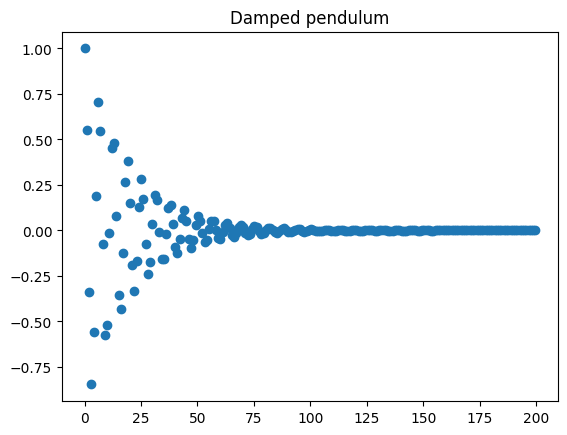

In [6]:
# Plotting
plt.figure()

plt.scatter(time_array, disp_array)

plt.title('Damped pendulum')

plt.show()
plt.close()

### c) Use a physically-motivated model, and constrain its free parameters by carrying out a regression.

In [7]:
# Model
def physical_model(times, A, beta, omega):
    """
    """
    return A*np.exp(-beta*times)*np.cos(omega*times)

In [8]:
# Import the library
import scipy.optimize as opt

In [9]:
# Call the curve_fit() function
coef, cova = opt.curve_fit(physical_model, time_array, disp_array)

In [10]:
# Get the regression curve:
fit_array = physical_model(time_array, *coef)

### d) Report the results from your regression, i.e. the best-fit values for the free parametes with their respective uncertainties. Using your results, identify or calculate the following quantities in physical units:

- The initial amplitude, $A$, of the oscillations.
- The damping ratio, $\beta$.
- The angular frequency, $\omega$, of the damped pendulum.
- The damping coefficient, $b$.
- The force constant of the oscillator, $k$.

In [11]:
# A, beta and omega are given directly
A, beta, omega = coef[0], coef[1], coef[2]

# Then
print(f'Simply, A = {A}, beta = {beta}, omega = {omega}.')

Simply, A = 1.0031306018680461, beta = 0.05012386759729784, omega = 0.9962379022570641.


In [12]:
# Since beta = b/2m and m = 1kg,
b = beta*2

print(f'b = {b}.')

b = 0.10024773519459568.


While $k$ should be given by
$$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}} \implies k = m\left(\omega² + \frac{b²}{4m²}\right).$$

In [13]:
# So that
k = omega**2+b**2/4
print(f'k = {k}.')

k = 0.9950023599964671.


### e) Make a plot showing the empirical data and the best-fit model obtained from your regression.

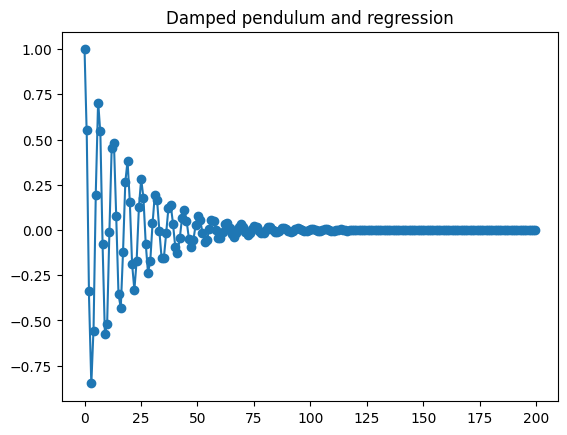

In [16]:
# Plotting:
plt.figure()

plt.scatter(time_array, disp_array, marker = 'o')
plt.plot(time_array, fit_array)

plt.title('Damped pendulum and regression')

plt.show()
plt.close()